In [5]:
import pandas as pd

# df_2025 = pd.read_excel("./datasets/eq_20251231.xlsx")
df_2024 = pd.read_excel("./datasets/eq_20241231.xlsx")
df_2023 = pd.read_excel("./datasets/eq_20231231.xlsx")
df_2022 = pd.read_excel("./datasets/eq_20221231.xlsx")
df_2021 = pd.read_excel("./datasets/eq_20211231.xlsx")
df_2020 = pd.read_excel("./datasets/eq_20201231.xlsx")
df_2019 = pd.read_excel("./datasets/eq_20191231.xlsx")
df_2018 = pd.read_excel("./datasets/eq_20181231.xlsx")
df_2017 = pd.read_excel("./datasets/eq_20171231.xlsx")
df_2016 = pd.read_excel("./datasets/eq_20161231.xlsx")
df_2015 = pd.read_excel("./datasets/eq_20151231.xlsx")

In [6]:
df_2024['year'] = 2024
df_2023['year'] = 2023
df_2022['year'] = 2022
df_2021['year'] = 2021
df_2020['year'] = 2020
df_2019['year'] = 2019
df_2018['year'] = 2018
df_2017['year'] = 2017
df_2016['year'] = 2016
df_2015['year'] = 2015

df = pd.concat([
    df_2024,
    df_2023,
    df_2022,
    df_2021,
    df_2020,
    df_2019,
    df_2018,
    df_2017,
    df_2016,
    df_2015,
])

# tencent 腾讯记录

In [7]:
# 选取 df 中 Name 是 Tencent Holdings Ltd 的所有数据
# 选取 Name 是 Tencent Holdings Ltd 的所有数据
tencent_data = df[df['Name'] == 'Tencent Holdings Ltd']

print(tencent_data)
# Market Value(USD)
# Ownership

     Region Country                  Name    Industry  Market Value(NOK)  \
1227   Asia   China  Tencent Holdings Ltd  Technology        75778905128   
1332   Asia   China  Tencent Holdings Ltd  Technology        39387871242   
1370   Asia   China  Tencent Holdings Ltd  Technology        37259642307   
1385   Asia   China  Tencent Holdings Ltd  Technology        44267062722   
1382   Asia   China  Tencent Holdings Ltd  Technology        49657347577   
1432   Asia   China  Tencent Holdings Ltd  Technology        34056452984   
1293   Asia   China  Tencent Holdings Ltd  Technology        26340175846   
1299   Asia   China  Tencent Holdings Ltd  Technology        33952282699   
1255   Asia   China  Tencent Holdings Ltd  Technology        15426706779   
1274   Asia   China  Tencent Holdings Ltd  Technology        11119168999   

      Market Value(USD)  Voting  Ownership Incorporation Country  year  
1227         6672234732    1.35       1.35        Cayman Islands  2024  
1332         3878

In [10]:
import akshare as ak
import pandas as pd
from datetime import datetime

# 腾讯控股的股票代码（香港交易所）
ticker = "00700"  # akshare使用5位数代码

# 下载2015-2025年的数据
start_date = "20150101"  # akshare使用YYYYMMDD格式
end_date = "20251231"

print(f"正在获取腾讯控股 ({ticker}) 的股票数据...")
# 使用akshare获取港股数据
stock_data = ak.stock_hk_hist(symbol=ticker, period="monthly", start_date=start_date, end_date=end_date, adjust="qfq")

# 将日期列设置为索引
stock_data['日期'] = pd.to_datetime(stock_data['日期'])
stock_data.set_index('日期', inplace=True)

# 获取每年最后一个交易日的数据
yearly_last_day = stock_data.resample('YE').last()

# 只保留收盘价列
result = yearly_last_day[['收盘']].copy()
# result.columns = ['Price (HKD)']

# # 获取当前汇率 (HKD to USD)
# print("\n正在获取港币兑美元汇率...")
# # 使用akshare获取汇率
# fx_data = ak.currency_boc_sina(symbol="港币", start_date=start_date, end_date=end_date)
# # 获取最新汇率（买入价）
# hkd_to_usd = float(fx_data.iloc[-1]['买入价']) / 100  # 转换为实际汇率

# # 转换为美元
# result['Price (USD)'] = result['Price (HKD)'] * hkd_to_usd

# # 格式化输出
# result.index = result.index.year
# result = result.round(2)

print("\n腾讯控股每年最后一个交易日的股票价格：")
print("=" * 60)
print(result)
print("=" * 60)
# print(f"\n注：使用汇率 1 HKD = {hkd_to_usd:.4f} USD")
# print(f"数据更新时间：{datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

正在获取腾讯控股 (00700) 的股票数据...

腾讯控股每年最后一个交易日的股票价格：
                 收盘
日期                 
2015-12-31  112.394
2016-12-31  148.956
2017-12-31  359.486
2018-12-31  271.046
2019-12-31  331.805
2020-12-31  515.829
2021-12-31  413.335
2022-12-31  305.570
2023-12-31  285.700
2024-12-31  412.500
2025-12-31  599.000



GPFG 持有腾讯股票数量（百万股）：
年份: 2015 | 市值: $1256211651M USD | 股价: 112.39 HKD | 持股: 11176856.87M 股
年份: 2016 | 市值: $1792198471M USD | 股价: 148.96 HKD | 持股: 12031730.65M 股
年份: 2017 | 市值: $4150975652M USD | 股价: 359.49 HKD | 持股: 11546974.44M 股
年份: 2018 | 市值: $3041889313M USD | 股价: 271.05 HKD | 持股: 11222778.84M 股
年份: 2019 | 市值: $3875644736M USD | 股价: 331.81 HKD | 持股: 11680489.25M 股
年份: 2020 | 市值: $5799770797M USD | 股价: 515.83 HKD | 持股: 11243591.96M 股
年份: 2021 | 市值: $5019908908M USD | 股价: 413.33 HKD | 持股: 12144891.94M 股
年份: 2022 | 市值: $3782320811M USD | 股价: 305.57 HKD | 持股: 12377919.33M 股
年份: 2023 | 市值: $3878400430M USD | 股价: 285.70 HKD | 持股: 13575080.26M 股
年份: 2024 | 市值: $6672234732M USD | 股价: 412.50 HKD | 持股: 16175114.50M 股


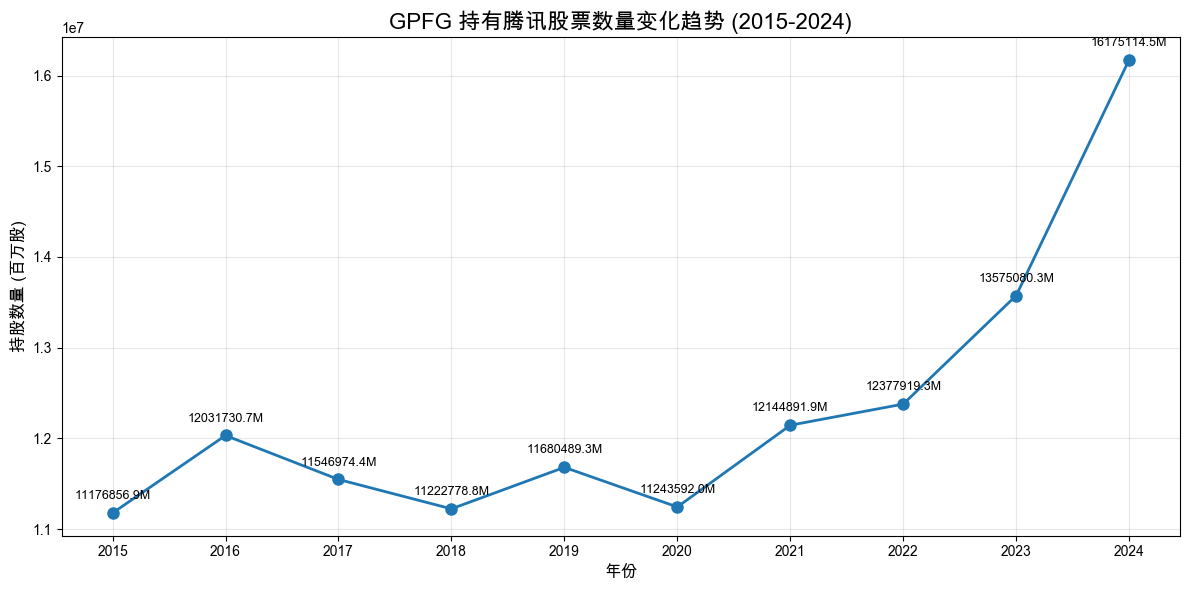


年度持股变化分析：
年份: 2015 | 基准年
年份: 2016 | 增持: 854873.78M 股 (+7.65%)
年份: 2017 | 减持: 484756.22M 股 (-4.03%)
年份: 2018 | 减持: 324195.60M 股 (-2.81%)
年份: 2019 | 增持: 457710.41M 股 (+4.08%)
年份: 2020 | 减持: 436897.29M 股 (-3.74%)
年份: 2021 | 增持: 901299.98M 股 (+8.02%)
年份: 2022 | 增持: 233027.40M 股 (+1.92%)
年份: 2023 | 增持: 1197160.92M 股 (+9.67%)
年份: 2024 | 增持: 2600034.24M 股 (+19.15%)


In [16]:
# 根据上述结果， gpfg 每年的 tencent 股票价值，tencent_data，和获取到的每年的股价，计算出，gpfg 每年年末持有的总的股票数量，并以曲线图显示出来

import matplotlib.pyplot as plt
import matplotlib
# 设置中文字体支持
matplotlib.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei', 'STHeiti']
matplotlib.rcParams['axes.unicode_minus'] = False
# 准备数据
tencent_data_sorted = tencent_data.sort_values('year')
yearly_last_day['year'] = yearly_last_day.index.year
# 合并数据：将股价数据与持仓数据合并
merged_data = tencent_data_sorted.merge(yearly_last_day[['year', '收盘']], on='year', how='inner')
# Market Value (USD) / (Stock Price (HKD) * HKD_to_USD rate) = 股票数量
merged_data['股票数量_百万股'] = merged_data['Market Value(USD)'] / merged_data['收盘']
print("\nGPFG 持有腾讯股票数量（百万股）：")
print("=" * 80)
for _, row in merged_data.iterrows():
    print(f"年份: {int(row['year'])} | 市值: ${row['Market Value(USD)']:.0f}M USD | "
          f"股价: {row['收盘']:.2f} HKD | "
          f"持股: {row['股票数量_百万股']:.2f}M 股")
print("=" * 80)
# 绘制曲线图
plt.figure(figsize=(12, 6))
plt.plot(merged_data['year'], merged_data['股票数量_百万股'], marker='o', linewidth=2, markersize=8)
plt.title('GPFG 持有腾讯股票数量变化趋势 (2015-2024)', fontsize=16, fontweight='bold')
plt.xlabel('年份', fontsize=12)
plt.ylabel('持股数量 (百万股)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(merged_data['year'])
# 在每个点上标注数值
for _, row in merged_data.iterrows():
    plt.annotate(f"{row['股票数量_百万股']:.1f}M", 
                 xy=(row['year'], row['股票数量_百万股']),
                 xytext=(0, 10), textcoords='offset points',
                 ha='center', fontsize=9)
plt.tight_layout()
plt.show()
# 额外分析：计算年度变化
merged_data_sorted = merged_data.sort_values('year')
merged_data_sorted['持股变化_百万股'] = merged_data_sorted['股票数量_百万股'].diff()
merged_data_sorted['持股变化率_%'] = (merged_data_sorted['股票数量_百万股'].pct_change() * 100)
print("\n年度持股变化分析：")
print("=" * 80)
for _, row in merged_data_sorted.iterrows():
    if pd.notna(row['持股变化_百万股']):
        change = row['持股变化_百万股']
        change_pct = row['持股变化率_%']
        direction = "增持" if change > 0 else "减持"
        print(f"年份: {int(row['year'])} | {direction}: {abs(change):.2f}M 股 ({change_pct:+.2f}%)")
    else:
        print(f"年份: {int(row['year'])} | 基准年")
print("=" * 80)

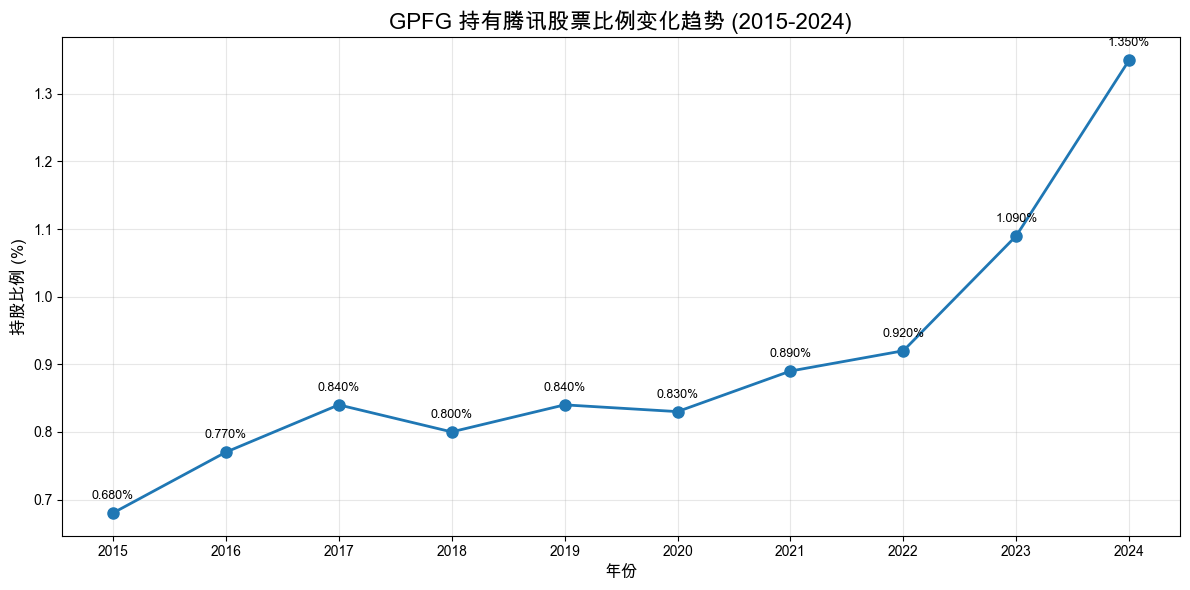


GPFG 持有腾讯股票比例详情：
年份: 2015 | 持股比例: 0.6800%
年份: 2016 | 持股比例: 0.7700%
年份: 2017 | 持股比例: 0.8400%
年份: 2018 | 持股比例: 0.8000%
年份: 2019 | 持股比例: 0.8400%
年份: 2020 | 持股比例: 0.8300%
年份: 2021 | 持股比例: 0.8900%
年份: 2022 | 持股比例: 0.9200%
年份: 2023 | 持股比例: 1.0900%
年份: 2024 | 持股比例: 1.3500%

年度持股比例变化分析：
年份: 2015 | 基准年
年份: 2016 | 增加: 0.0900% (+13.24%)
年份: 2017 | 增加: 0.0700% (+9.09%)
年份: 2018 | 减少: 0.0400% (-4.76%)
年份: 2019 | 增加: 0.0400% (+5.00%)
年份: 2020 | 减少: 0.0100% (-1.19%)
年份: 2021 | 增加: 0.0600% (+7.23%)
年份: 2022 | 增加: 0.0300% (+3.37%)
年份: 2023 | 增加: 0.1700% (+18.48%)
年份: 2024 | 增加: 0.2600% (+23.85%)


In [17]:
# tencent_data 的 ownership 变化曲线

# 绘制 Ownership 变化曲线
plt.figure(figsize=(12, 6))
plt.plot(tencent_data_sorted['year'], tencent_data_sorted['Ownership'], 
         marker='o', linewidth=2, markersize=8, color='#1f77b4')
plt.title('GPFG 持有腾讯股票比例变化趋势 (2015-2024)', fontsize=16, fontweight='bold')
plt.xlabel('年份', fontsize=12)
plt.ylabel('持股比例 (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(tencent_data_sorted['year'])

# 在每个点上标注数值
for _, row in tencent_data_sorted.iterrows():
    plt.annotate(f"{row['Ownership']:.3f}%", 
                 xy=(row['year'], row['Ownership']),
                 xytext=(0, 10), textcoords='offset points',
                 ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# 打印 Ownership 详细数据
print("\nGPFG 持有腾讯股票比例详情：")
print("=" * 60)
for _, row in tencent_data_sorted.iterrows():
    print(f"年份: {int(row['year'])} | 持股比例: {row['Ownership']:.4f}%")
print("=" * 60)

# 计算 Ownership 变化
ownership_changes = tencent_data_sorted.copy()
ownership_changes['Ownership_变化'] = ownership_changes['Ownership'].diff()
ownership_changes['Ownership_变化率_%'] = (ownership_changes['Ownership'].pct_change() * 100)

print("\n年度持股比例变化分析：")
print("=" * 60)
for _, row in ownership_changes.iterrows():
    if pd.notna(row['Ownership_变化']):
        change = row['Ownership_变化']
        change_pct = row['Ownership_变化率_%']
        direction = "增加" if change > 0 else "减少"
        print(f"年份: {int(row['year'])} | {direction}: {abs(change):.4f}% ({change_pct:+.2f}%)")
    else:
        print(f"年份: {int(row['year'])} | 基准年")
print("=" * 60)